<AxesSubplot:xlabel='r', ylabel='l'>

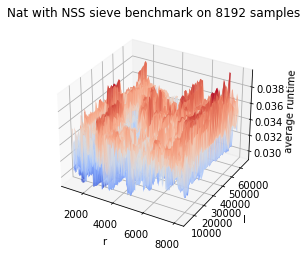

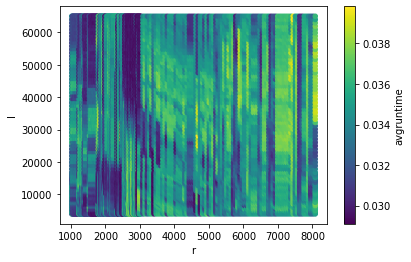

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d


#stock_files = sorted(glob("../data/nat_benchmark/nss_sieve/*.csv"))
stock_files = sorted(glob("../data/nss_benchmark/nss_sieve/*.csv"))

df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)

df.columns = df.columns.str.strip()

r = df.r
l = df.l
avgruntime = df.avgruntime

ax = plt.axes(projection='3d')
ax.set_title("Nat with NSS sieve benchmark on 8192 samples")
ax.set_xlabel('r')
ax.set_ylabel('l')
ax.set_zlabel('average runtime')

ax.plot_trisurf(r, l, avgruntime, cmap="coolwarm", edgecolor="none")


df.plot.scatter(x=0, y=1, c=2, colormap="viridis", sharex=False)


#plt.savefig("benchmark/plots/nss_benchmark_plot.png")